# Continuous Control Project Report

---

### 1.Examination of State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of +0.1 is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of 33 variables corresponding to position, rotation, velocity, and angular velocities of the arm. Each action is a vector with four numbers, corresponding to torque applicable to two joints. Every entry in the action vector should be a number between -1 and 1.

### 2. Algorithm

Algorithm is DDPG. DDPG algorithm uses two seperate network which are working collaboratively; actor and critic. Actor network does policiy approximation where critic does value estimation. Training of this network composed out of two steps; acting and learning. In acting step, agent gives state vector as an input to Actor network and receives actions to be taken. In learning step, Critic network evaluates correctness of action taken and gives feed to Actor network so Actor network adjust its weights accordingly.

In [7]:
from model import Actor, Critic
from agent import Agent

import pandas as pd
import matplotlib.pyplot as plt
import random
import copy
from collections import namedtuple, deque
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [8]:
agent = Agent(state_size=state_size, 
              action_size=action_size, 
              random_seed=10)

In [9]:
def ddpg(n_episodes=2000, max_t=10000):

    scores = []
    scores_deque = deque(maxlen=100)
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]           
        score = 0
        
        for t in range(max_t):
            action = agent.act(state)         
       
            env_info = env.step(action)[brain_name]       
            next_state = env_info.vector_observations[0]  
            reward = env_info.rewards[0]                  
            done = env_info.local_done[0]                  
            agent.step(state, action, reward, next_state, done) 
            score += reward                                
            state = next_state                             
            if done:                                      
                break
        
        scores_deque.append(score)      
        scores.append(score)            

        print('\rEpisode {} score: {:.2f}\tAverage Score: {:.2f}'.format(i_episode, score, np.mean(scores_deque)))
        
        print('\rAfter Episode {} average score is: {:.2f}'.format(i_episode, np.mean(scores_deque)))
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        
        if np.mean(scores_deque)>=30.0:
            print('\nEnvironment solved in {:d} episodes and average score is: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
            
    return scores

### 3. Networks

#### Actor Network

input size = 33 output size = 4
2 hidden layers and one output layer
each hidden layer has 256 hidden units and is followed by a ReLU activation layer
A batch normalization layer after the first layer
Output layer is followed by a tanh activation layer


#### Critic Network

input size = 4 output size = 1
2 hidden layers and one output layer
each hidden layer has 256 hidden units and is followed by a ReLU activation layer
A batch normalization layer after the first layer
Output layer is followed by a linear activation unit


#### Hyperparameters

BUFFER_SIZE = int(1e5)  
BATCH_SIZE = 128        
GAMMA = 0.99            
TAU = 0.001              
LR_ACTOR = 0.0001        
LR_CRITIC = 0.0001       
WEIGHT_DECAY = 0 

In [10]:
scores = ddpg(n_episodes=5000)

Episode 1 score: 0.16	Average Score: 0.16
After Episode 1 average score is: 0.16
Episode 2 score: 0.30	Average Score: 0.23
After Episode 2 average score is: 0.23
Episode 3 score: 0.80	Average Score: 0.42
After Episode 3 average score is: 0.42
Episode 4 score: 1.28	Average Score: 0.63
After Episode 4 average score is: 0.63
Episode 5 score: 1.65	Average Score: 0.84
After Episode 5 average score is: 0.84
Episode 6 score: 0.63	Average Score: 0.80
After Episode 6 average score is: 0.80
Episode 7 score: 0.62	Average Score: 0.78
After Episode 7 average score is: 0.78
Episode 8 score: 0.83	Average Score: 0.78
After Episode 8 average score is: 0.78
Episode 9 score: 0.45	Average Score: 0.75
After Episode 9 average score is: 0.75
Episode 10 score: 1.75	Average Score: 0.85
After Episode 10 average score is: 0.85
Episode 11 score: 0.77	Average Score: 0.84
After Episode 11 average score is: 0.84
Episode 12 score: 0.12	Average Score: 0.78
After Episode 12 average score is: 0.78
Episode 13 score: 0.96

Episode 100 score: 4.40	Average Score: 3.21
After Episode 100 average score is: 3.21
Episode 101 score: 3.37	Average Score: 3.25
After Episode 101 average score is: 3.25
Episode 102 score: 6.61	Average Score: 3.31
After Episode 102 average score is: 3.31
Episode 103 score: 4.67	Average Score: 3.35
After Episode 103 average score is: 3.35
Episode 104 score: 6.45	Average Score: 3.40
After Episode 104 average score is: 3.40
Episode 105 score: 6.56	Average Score: 3.45
After Episode 105 average score is: 3.45
Episode 106 score: 6.86	Average Score: 3.51
After Episode 106 average score is: 3.51
Episode 107 score: 5.33	Average Score: 3.56
After Episode 107 average score is: 3.56
Episode 108 score: 7.62	Average Score: 3.63
After Episode 108 average score is: 3.63
Episode 109 score: 7.14	Average Score: 3.69
After Episode 109 average score is: 3.69
Episode 110 score: 4.06	Average Score: 3.72
After Episode 110 average score is: 3.72
Episode 111 score: 4.28	Average Score: 3.75
After Episode 111 ave

Episode 196 score: 24.20	Average Score: 11.45
After Episode 196 average score is: 11.45
Episode 197 score: 16.11	Average Score: 11.52
After Episode 197 average score is: 11.52
Episode 198 score: 19.83	Average Score: 11.67
After Episode 198 average score is: 11.67
Episode 199 score: 15.15	Average Score: 11.77
After Episode 199 average score is: 11.77
Episode 200 score: 20.92	Average Score: 11.94
After Episode 200 average score is: 11.94
Episode 201 score: 21.14	Average Score: 12.12
After Episode 201 average score is: 12.12
Episode 202 score: 25.61	Average Score: 12.31
After Episode 202 average score is: 12.31
Episode 203 score: 18.33	Average Score: 12.44
After Episode 203 average score is: 12.44
Episode 204 score: 25.79	Average Score: 12.64
After Episode 204 average score is: 12.64
Episode 205 score: 26.26	Average Score: 12.83
After Episode 205 average score is: 12.83
Episode 206 score: 21.69	Average Score: 12.98
After Episode 206 average score is: 12.98
Episode 207 score: 8.49	Average 

Episode 290 score: 39.02	Average Score: 29.88
After Episode 290 average score is: 29.88
Episode 291 score: 36.86	Average Score: 30.01
After Episode 291 average score is: 30.01

Environment solved in 291 episodes and average score is: 30.01


### 4. Plot of Reward

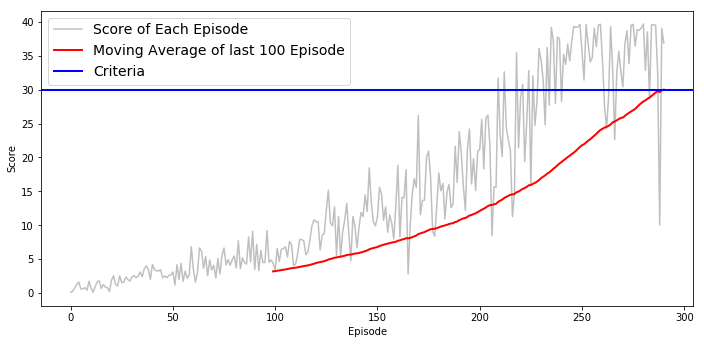

In [11]:
fig, ax = plt.subplots(1, 1, figsize=[10, 5])
plt.rcParams.update({'font.size': 14})


scores_avg = pd.Series(scores).rolling(100).mean()
ax.plot(scores, "-", c="black", alpha=0.25)
ax.plot(scores_avg, "-", c="red", linewidth=2)
ax.set_xlabel("Episode")
ax.set_ylabel("Score")
ax.axhline(30, c="blue", linewidth=2)
ax.legend(["Score of Each Episode", "Moving Average of last 100 Episode", "Criteria"])

fig.tight_layout()

In [12]:
env.close()

### 5. Future Work

There are more network would be reasonable to try out if better performance can be observed like like PPO, A3C, and D4PG.A3C can be tried first in order to do parallel training.
 
A3C: Waiting to experience the environment for a little longer before to calculate expected return of original state. Less bias, keep variance in control. Faster convergence with less experience. A3C replaces replay buffer with parallel training using parallel agents. 